<a href="https://colab.research.google.com/github/Luc1lfer/SoftEng/blob/main/bago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 13.2 MB/s eta 0:00:00


Columns with all NaN values before imputation: ['Growth Rate (%)', 'Innovation Index', 'Awareness Campaign Impact']
NaN values after imputing numerical_features: Market Size (USD Million)        0
CAGR(%)                          0
Market Penetration               0
Growth Rate (%)              50000
Innovation Index             50000
Regulatory Impact                0
Awareness Campaign Impact    50000
Market Share (%)                 0
Revenue Contribution (%)         0
Event Month                      0
Event Year                       0
Material Type                    0
Product Type                     0
Distribution Channel             0
Region                           0
dtype: int64
NaN values in processed_df after one-hot encoding:
 Market Size (USD Million)                      0
CAGR(%)                                        0
Market Penetration                             0
Growth Rate (%)                            50000
Innovation Index                           50000
Reg

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


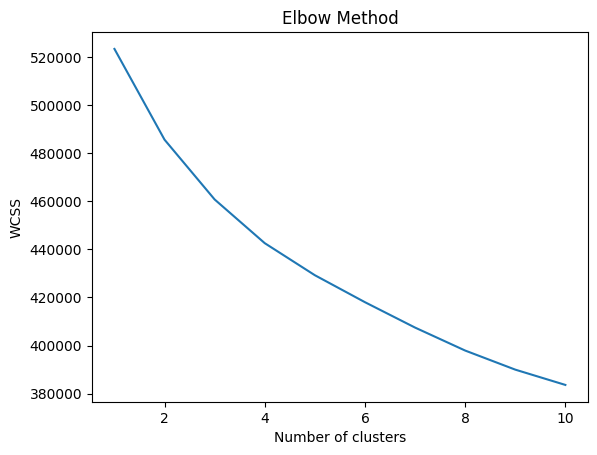

For n_clusters = 2 The average silhouette_score is : 0.0709351713520147
For n_clusters = 3 The average silhouette_score is : 0.0627856172098541
For n_clusters = 4 The average silhouette_score is : 0.06518008868597173
For n_clusters = 5 The average silhouette_score is : 0.06090708836977613
For n_clusters = 6 The average silhouette_score is : 0.06085915199465906
For n_clusters = 7 The average silhouette_score is : 0.06119388311843836
For n_clusters = 8 The average silhouette_score is : 0.06292918508914878
For n_clusters = 9 The average silhouette_score is : 0.06187050787876948
For n_clusters = 10 The average silhouette_score is : 0.06090506842072216


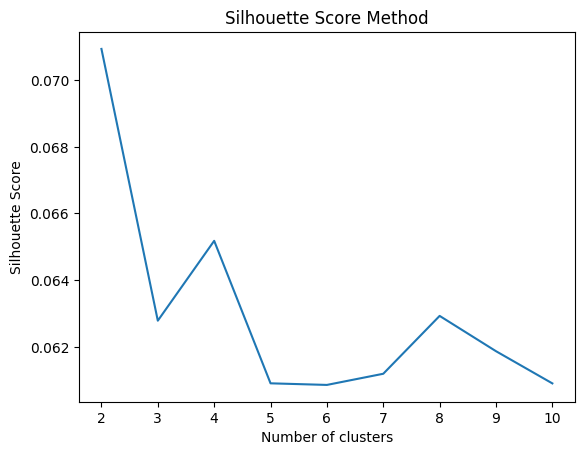

  Brand Name       Region  Cluster
0      Durex   West India        0
1    Playboy   West India        1
2      Skore  North India        3
3      Durex   West India        1
4      Skore  South India        3


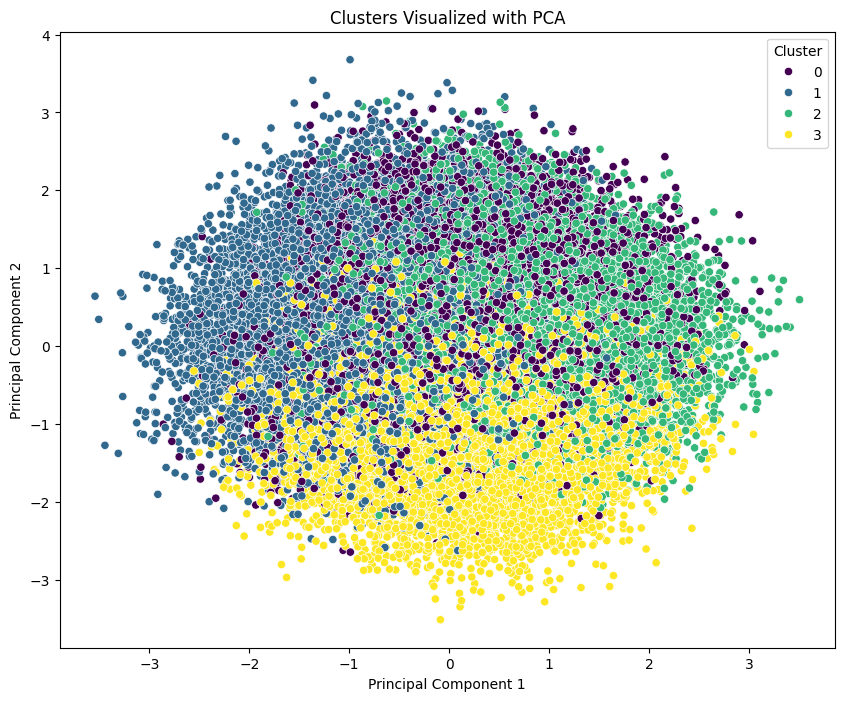

         Market Size (USD Million)    CAGR(%)  Market Penetration  \
Cluster                                                             
0                      1397.676787  10.514017            1.297944   
1                      1402.473724  10.489346            1.291077   
2                      1393.665790  10.508301            2.630372   
3                      1400.912868  10.515173            2.641120   

         Growth Rate (%)  Innovation Index  Regulatory Impact  \
Cluster                                                         
0                    NaN               NaN           2.762626   
1                    NaN               NaN           1.234269   
2                    NaN               NaN           1.731055   
3                    NaN               NaN           2.262200   

         Awareness Campaign Impact  Market Share (%)  \
Cluster                                                
0                              NaN         22.458054   
1                         

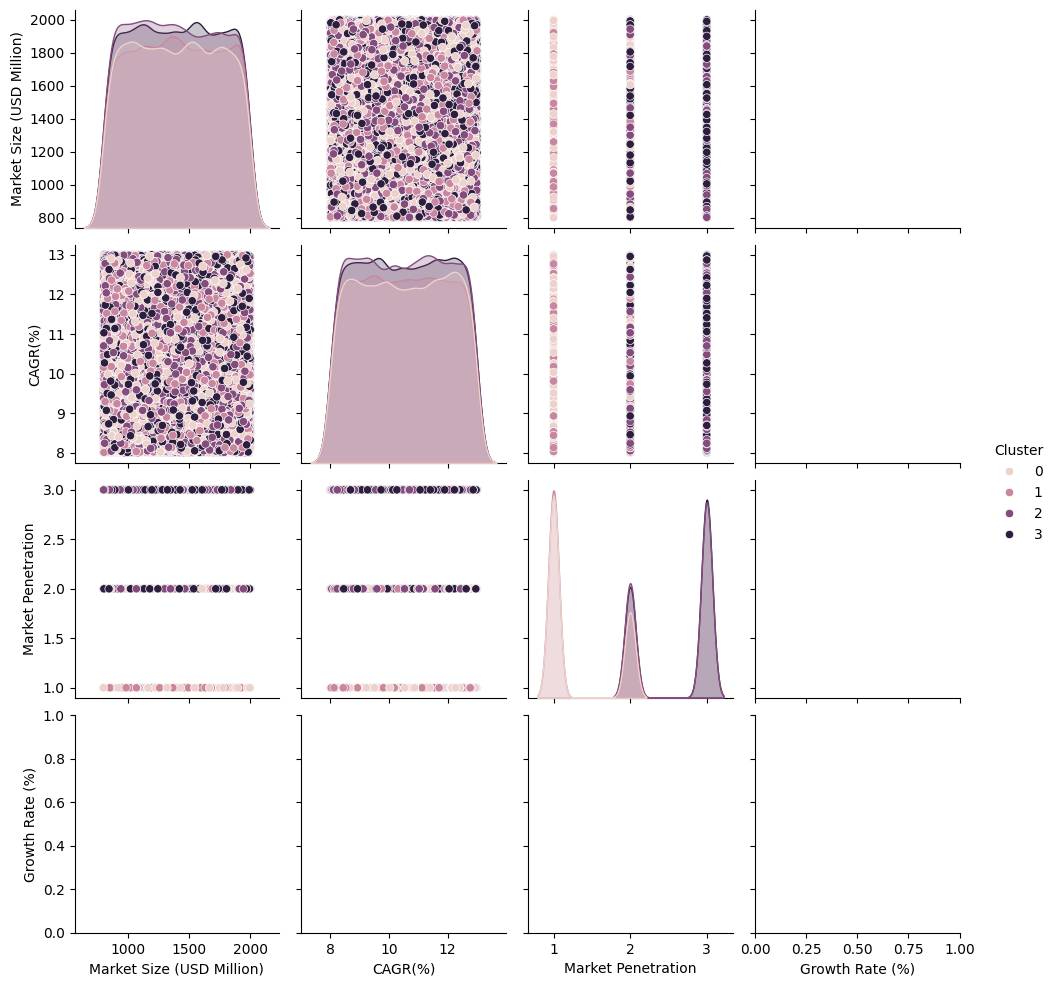

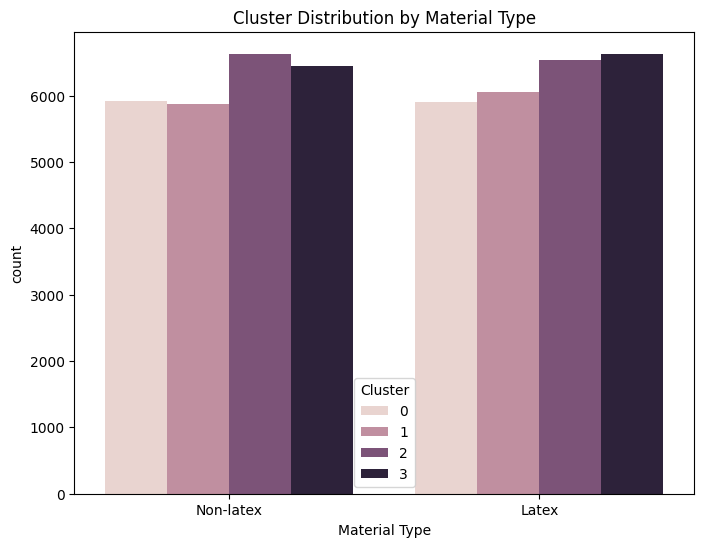

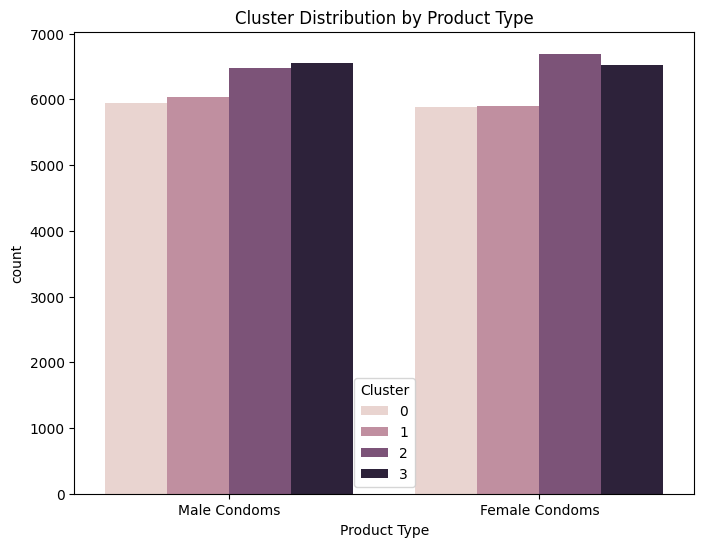

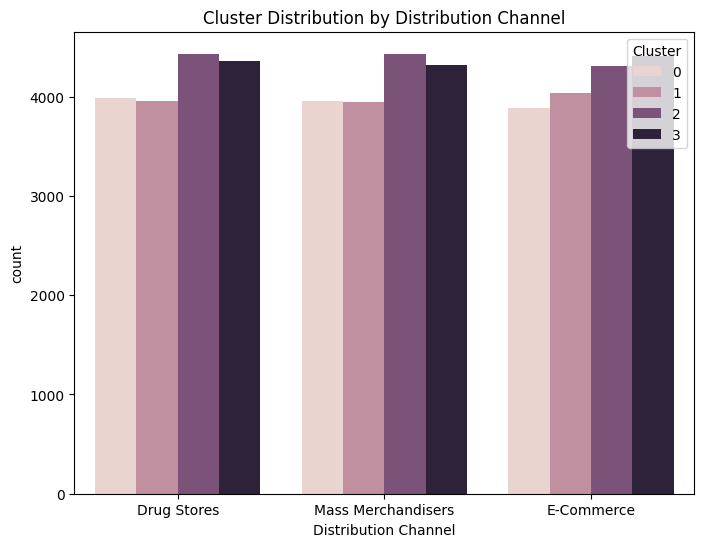

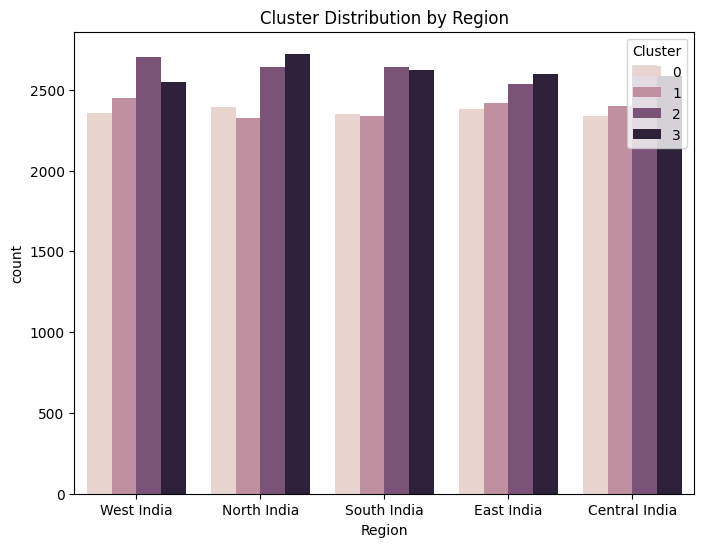

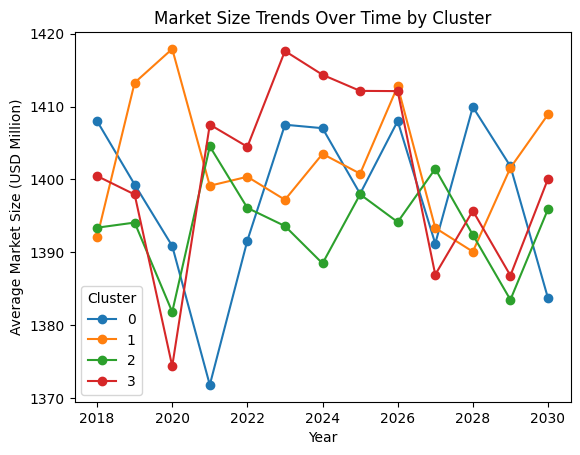

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Step 1: Load and Inspect the Data
data = pd.read_csv('India_Condom_Market_Dataset.csv')

# Step 2: Identify and Correct Data Types
data.rename(columns={'CAGR (%)': 'CAGR(%)'}, inplace=True)
mapping = {'Low': 1, 'Medium': 2, 'High': 3}
for col in ['Market Penetration', 'Growth Rate (%)', 'Innovation Index', 'Regulatory Impact', 'Awareness Campaign Impact']:
    data[col] = data[col].map(mapping)
data.fillna(data.mean(numeric_only=True), inplace=True)

# Step 3: Data Preprocessing (Handling 'Event Date')
data['Event Date'] = pd.to_datetime(data['Event Date'], errors='coerce')
data['Event Month'] = data['Event Date'].dt.month
data['Event Year'] = data['Event Date'].dt.year
data.drop('Event Date', axis=1, inplace=True)

# Step 4: Define Features and Create Subset
numerical_features = ['Market Size (USD Million)', 'CAGR(%)', 'Market Penetration', 'Growth Rate (%)', 'Innovation Index', 'Regulatory Impact', 'Awareness Campaign Impact','Market Share (%)','Revenue Contribution (%)','Event Month','Event Year']
categorical_features = ['Material Type', 'Product Type', 'Distribution Channel', 'Region']
all_features = numerical_features + categorical_features

# Verify that all_features are in the dataframe's columns:
missing_cols = [f for f in all_features if f not in data.columns]
if missing_cols:
    raise ValueError(f"The following columns are missing from the dataframe: {missing_cols}")

# Step 5: Create Data Subset
data_subset = data[all_features].copy()

# Step 6: Identify Columns with All NaN Values BEFORE Imputation
nan_cols = data_subset.columns[data_subset.isnull().all()].tolist()
print(f"Columns with all NaN values before imputation: {nan_cols}")

# Step 7: Handle NaN values in numerical_features by imputing them BEFORE ColumnTransformer
for col in numerical_features:
    if data_subset[col].isnull().any():
        data_subset[col] = data_subset[col].fillna(data_subset[col].mean())
print(f"NaN values after imputing numerical_features: {data_subset.isnull().sum()}")

# Step 8: Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Step 9: Fit and Transform Data
processed_data = preprocessor.fit_transform(data_subset)

# Step 10: Create Processed DataFrame
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
processed_df = pd.DataFrame(processed_data,
                            columns=numerical_features + list(ohe_feature_names))

# Step 11: Check for NaN values in processed_df
print("NaN values in processed_df after one-hot encoding:\n", processed_df.isnull().sum())

# Step 12: Drop the all-NaN columns from processed_df
processed_df.drop(columns=nan_cols, errors='ignore', inplace=True)

# Step 13: Check if there are any remaining NaN values
print("Remaining NaN values in processed_df after dropping all-NaN columns:\n", processed_df.isnull().sum())

# Step 14: K-Means Clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(processed_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score Method
silhouette_scores = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(processed_df)
    silhouette_avg = silhouette_score(processed_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_cluster,
          "The average silhouette_score is :", silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the optimal number of clusters (e.g., 4 based on the Elbow Method)
n_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(processed_df)

# Create a mapping from original index to cluster label
cluster_mapping = dict(zip(processed_df.index, cluster_labels))

# Map the cluster labels back to the original dataframe, preserving the index
data['Cluster'] = data.index.map(cluster_mapping)

# Display cluster assignments
print(data[['Brand Name', 'Region', 'Cluster']].head())

# Step 14.5: Apply PCA for Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(processed_df)

# Create a PCA DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster']

# Step 14.6: Plot the Clusters using PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Step 15: Analyze Cluster Characteristics
cluster_summary = data.groupby('Cluster').agg({
    'Market Size (USD Million)': 'mean',
    'CAGR(%)': 'mean',
    'Market Penetration': 'mean',
    'Growth Rate (%)': 'mean',
    'Innovation Index': 'mean',
    'Regulatory Impact': 'mean',
    'Awareness Campaign Impact': 'mean',
    'Market Share (%)': 'mean',
    'Revenue Contribution (%)':'mean',
    'Material Type': lambda x: x.value_counts().index[0],
    'Product Type': lambda x: x.value_counts().index[0],
    'Distribution Channel': lambda x: x.value_counts().index[0],
    'Region': lambda x: x.value_counts().index[0],
    'Brand Name': lambda x: x.value_counts().index[0]
})

print(cluster_summary)

# Step 16: Visualize Results
sns.pairplot(data, hue='Cluster', vars=['Market Size (USD Million)', 'CAGR(%)', 'Market Penetration', 'Growth Rate (%)'])
plt.show()

for feature in ['Material Type', 'Product Type', 'Distribution Channel', 'Region']:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=feature, hue='Cluster')
    plt.title(f'Cluster Distribution by {feature}')
    plt.show()

# Step 17: Time Series Analysis
yearly_cluster_summary = data.groupby(['Year', 'Cluster'])['Market Size (USD Million)'].mean().unstack()
yearly_cluster_summary.plot(kind='line', marker='o')
plt.title('Market Size Trends Over Time by Cluster')
plt.xlabel('Year')
plt.ylabel('Average Market Size (USD Million)')
plt.legend(title='Cluster')
plt.show()
